In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df1 = pd.read_csv(
    r'C:\Users\Utilizador\Desktop\Uni\Estágios\2025 - InnoWave\Solar DG\solar_data\Plant_1_Generation_Data.csv',
    encoding='utf-8',
    engine='python',
    index_col='DATE_TIME'
)

df2 = pd.read_csv(
    r'C:\Users\Utilizador\Desktop\Uni\Estágios\2025 - InnoWave\Solar DG\solar_data\Plant_1_Weather_Sensor_Data.csv',
    encoding='utf-8',
    engine='python',
    index_col='DATE_TIME'
)

In [3]:
# Change df2 DATE_TIME format to match df1's
df2.index = pd.to_datetime(df2.index)
df2.index = df2.index.strftime('%d-%m-%Y %H:%M')
df2 = df2.rename_axis('DATE_TIME')

In [4]:
df1.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [8]:
df1['SOURCE_KEY'].nunique()

22

In [9]:
df2.head()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,
15-05-2020 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
15-05-2020 00:15,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
15-05-2020 00:30,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
15-05-2020 00:45,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
15-05-2020 01:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [10]:
df2['SOURCE_KEY'].nunique()

1

In [6]:
df_merged = pd.merge(df1, df2, on=['DATE_TIME', 'PLANT_ID'], how='inner')

In [7]:
df_merged = df_merged.rename(columns={'SOURCE_KEY_x': 'SPURCE_KEY_GEN', 'SOURCE_KEY_y': 'SOURCE_KEY_WEATHER'})

In [8]:
df_merged.head()

,PLANT_ID,SPURCE_KEY_GEN,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_WEATHER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,,,,,,
15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


<AxesSubplot:xlabel='DATE_TIME'>

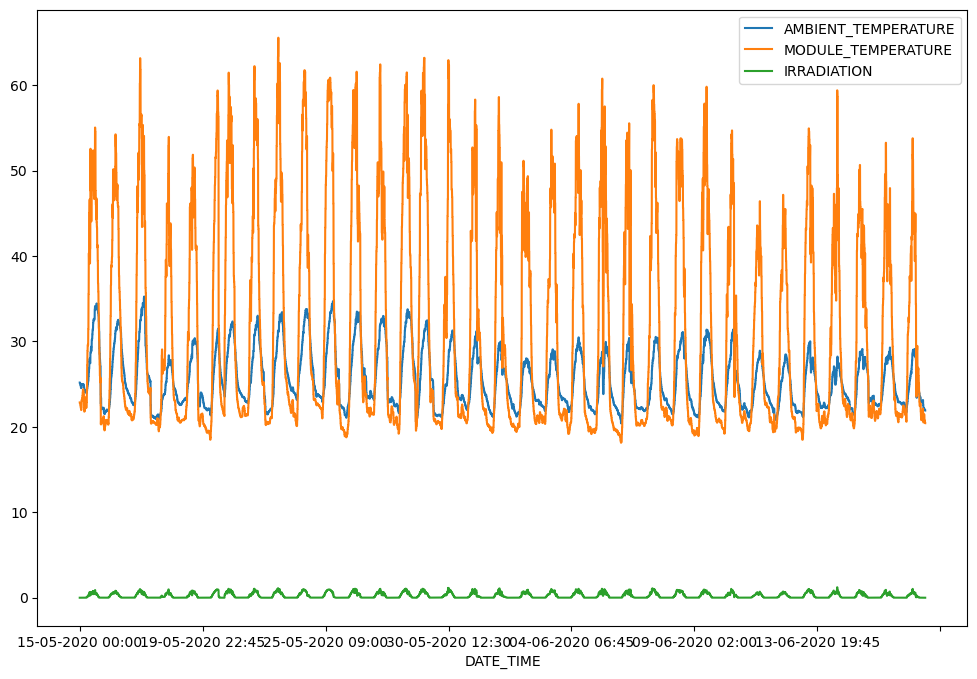

In [9]:
#df_merged['DAILY_YIELD'].plot(figsize=(12,8), legend=True)
df_merged['AMBIENT_TEMPERATURE'].plot(figsize=(12,8), legend=True)
df_merged['MODULE_TEMPERATURE'].plot(legend=True)
df_merged['IRRADIATION'].plot(legend=True)

<AxesSubplot:xlabel='DATE_TIME'>

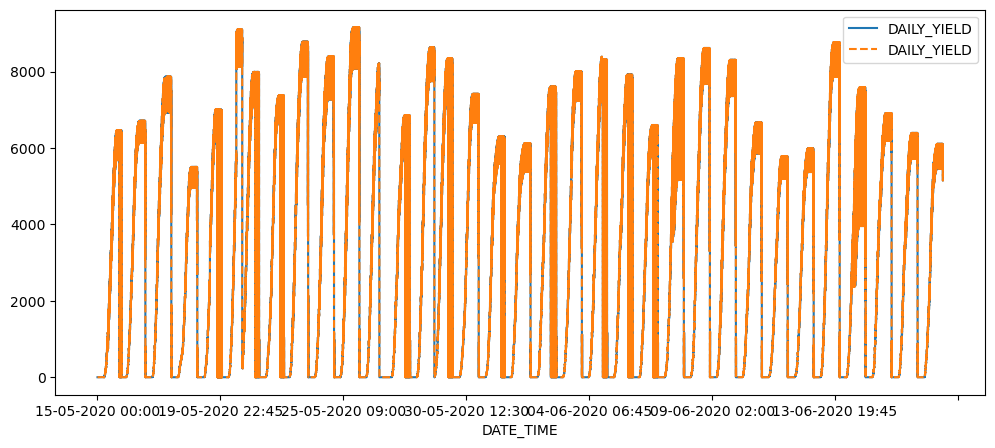

In [10]:
df1['DAILY_YIELD'].plot(legend=True, figsize=(12,5))
df_merged['DAILY_YIELD'].plot(legend=True, linestyle='--')

In [11]:
df1[(df1['DAILY_YIELD'] > 0)].head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
15-05-2020 06:15,4135001,1BY6WEcLGh8j5v7,278.000000,26.862500,2.625000,6259561.625
15-05-2020 06:15,4135001,1IF53ai7Xc0U56Y,310.571429,30.014286,3.000000,6183648.000
15-05-2020 06:15,4135001,3PZuoBAID5Wc2HD,318.625000,30.775000,3.500000,6987762.500
15-05-2020 06:15,4135001,7JYdWkrLSPkdwr4,316.250000,30.562500,3.500000,7602963.500
15-05-2020 06:15,4135001,McdE0feGgRqW7Ca,311.428571,30.100000,3.142857,7158967.143


In [12]:
# Convert date value in the index (from String) to datetime objects
df_merged.index = pd.to_datetime(df_merged.index, format='%d-%m-%Y %H:%M')

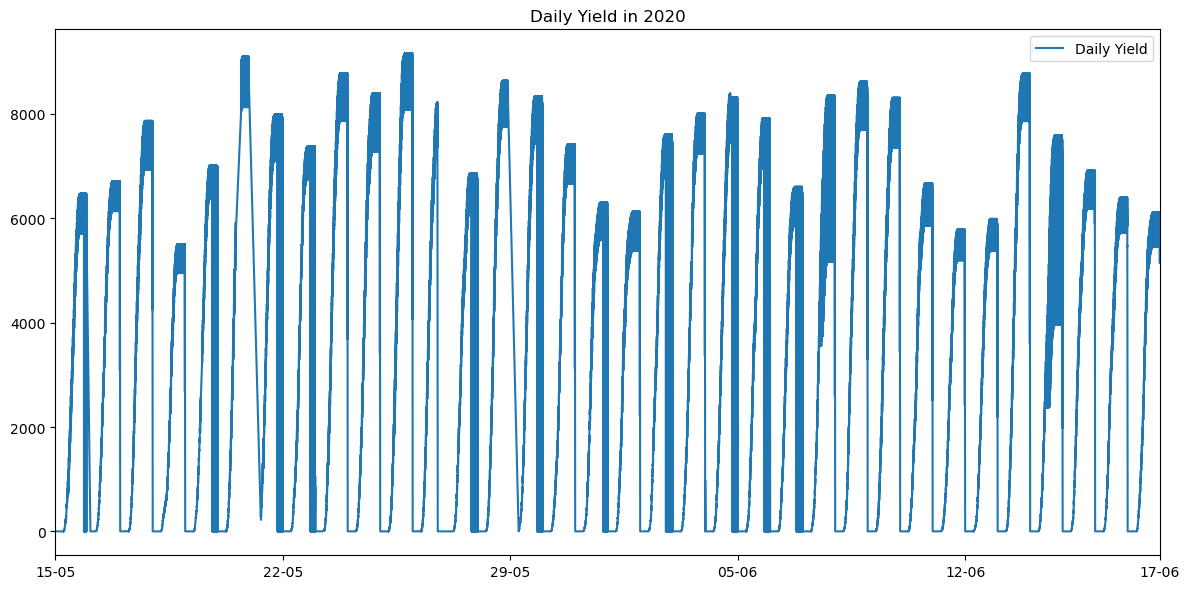

In [13]:
# Define the range from first to last
start_date = df_merged.index.min()
end_date = df_merged.index.max()

# Create tick locations
tick_locs = pd.date_range(start=start_date, end=end_date, freq='7D')

# Force x-axis label to start and end with the first and last date
if start_date not in tick_locs:
    tick_locs = tick_locs.insert(0, start_date)
if end_date not in tick_locs:
    tick_locs = tick_locs.append(pd.DatetimeIndex([end_date]))



plt.figure(figsize=(12,6))
plt.plot(df_merged.index, df_merged['DAILY_YIELD'], label='Daily Yield')

plt.xticks(tick_locs, rotation=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.title('Daily Yield in 2020')
plt.legend()

# No empty spaces in x-axis
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

In [14]:
df_merged2 = pd.merge(df1, df2, on=['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY'], how='left')

In [15]:
df_merged2[(df_merged2['SOURCE_KEY'] == 'HmiyD2TTLFNqkNe')]

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,,,,,


In [16]:
df_merged2.dropna()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,,,,,


In [17]:
# Reset index temporarily to use DATE_TIME in merge
df1_reset = df1.reset_index()
df2_reset = df2.reset_index()

# Merge on ['DATE_TIME', 'PLANT_ID'], but drop SOURCE_KEY from df2 to avoid duplicate columns
df_merged = pd.merge(
    df1_reset,
    df2_reset.drop(columns=['SOURCE_KEY']),
    on=['DATE_TIME', 'PLANT_ID'],
    how='inner'
)

# Now stack SOURCE_KEY columns from df1 and df2 into one Series with the original index order

# Prepare two DataFrames with 'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY'
df1_sk = df1_reset[['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY']]
df2_sk = df2_reset[['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY']]

# Filter to common keys (optional if you want to restrict)
common_keys = pd.merge(df1_sk, df2_sk, on=['DATE_TIME', 'PLANT_ID'], how='inner')[['DATE_TIME', 'PLANT_ID']]

df1_sk = pd.merge(df1_sk, common_keys, on=['DATE_TIME', 'PLANT_ID'], how='inner')
df2_sk = pd.merge(df2_sk, common_keys, on=['DATE_TIME', 'PLANT_ID'], how='inner')

# Concatenate the two SOURCE_KEY sets (as rows)
source_key_combined = pd.concat([df1_sk, df2_sk]).sort_values(['DATE_TIME', 'PLANT_ID'])

# Now, merge source_key_combined back to df_merged on ['DATE_TIME', 'PLANT_ID']
# But df_merged has one row per combination, so to keep all SOURCE_KEY rows separately,
# you’ll have to work with this dataframe separately or merge carefully

# If you want just the merged dataframe with one SOURCE_KEY column stacking values (multiple rows per datetime+plant):
final_df = source_key_combined.merge(
    df_merged.drop(columns=['SOURCE_KEY']),  # drop any SOURCE_KEY from merged to avoid conflict
    on=['DATE_TIME', 'PLANT_ID'],
    how='left'
)

# Set DATE_TIME back as index if needed
final_df.set_index('DATE_TIME', inplace=True)


In [18]:
df1.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [19]:
# df2 = Plant_1_Weather_Sensor_Data.csv
df2.head()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,
15-05-2020 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
15-05-2020 00:15,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
15-05-2020 00:30,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
15-05-2020 00:45,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
15-05-2020 01:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [20]:
# df1 = Plant_1_Generation_Data.csv
df1[(df1['SOURCE_KEY'] == 'HmiyD2TTLFNqkNe')].head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
